In [ ]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Set the directory path where training data is located
TRAIN_DIR = r'C:\Users\tarik\Desktop\cvpr\archive\cifar10\cifar10\train'

# Initialize an empty list to store category names
CATEGORIES = []

# Iterate through the contents of the training directory
for c in os.listdir(TRAIN_DIR):
    # Append each category name to the list
    CATEGORIES.append(c)

# Print out the list of category names
print(CATEGORIES)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
# Initialize an empty list to store training data
TRAIN_DATA = []

# Iterate through each category in the list of categories
for c in CATEGORIES:
    # Construct the path to the directory containing images for the current category
    path = os.path.join(TRAIN_DIR, c)
    
    # Get the numerical label for the current category
    class_num = CATEGORIES.index(c)
    
    # Iterate through each image file in the current category's directory
    for img in tqdm(os.listdir(path)):
        # Construct the full path to the current image file
        img_path = os.path.join(path, img)
        
        # Read the image using OpenCV and convert it to grayscale
        img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Append a tuple containing the image array and its corresponding class label to the training data list
        TRAIN_DATA.append([img_arr, class_num])

# Print the total number of training samples
print(len(TRAIN_DATA))


100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3650.24it/s]

50000


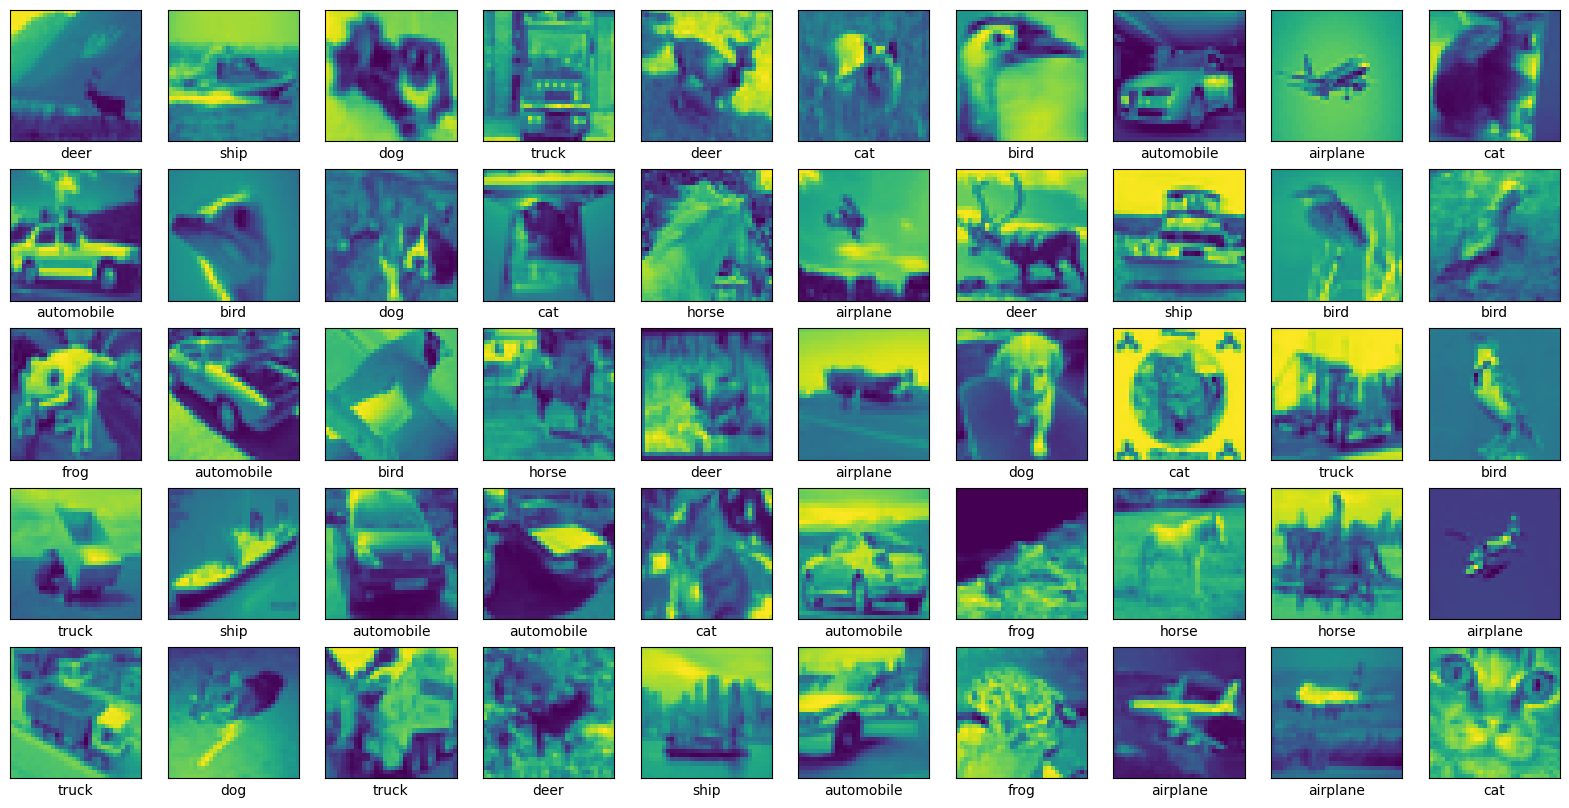

In [5]:
# Shuffle the training data to ensure randomness
random.shuffle(TRAIN_DATA)

# Create a figure for plotting with a size of 20x10 inches
plt.figure(figsize=(20,10))

# Iterate through the first 50 samples in the shuffled training data
for i in range(50):
    # Create subplots with a 5x10 grid, and plot each sample
    plt.subplot(5,10,i+1)
    
    # Display the image of the current sample
    plt.imshow(TRAIN_DATA[i][0])
    
    # Add label indicating the category of the image
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    
    # Remove ticks from the x and y axes
    plt.xticks([])
    plt.yticks([])
    
    # Break the loop if 50 samples have been plotted
    if i==50:
        break

# Show the plot
plt.show()


In [7]:
# Shuffle the TRAIN_DATA list
random.shuffle(TRAIN_DATA)

# Set up subplots for visualization
plt.figure(figsize=(20,10))

# Divide TRAIN_DATA into five subsets for visualization
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]


In [8]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Maximum value of k
k_max = 20

# Function to calculate L1 distance between two vectors
def l1_dist(x, y):
    return np.sum(np.abs(x - y))

# Function to calculate L2 distance between two vectors
def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Lists to store mean and standard deviation of accuracies for L1 and L2 distances
mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

# Loop through odd values of k from 1 to k_max (inclusive)
for k in (range(1, k_max+1,2)):
    fold_accuracies_l1 = []  # List to store accuracies for L1 distance
    fold_accuracies_l2 = []  # List to store accuracies for L2 distance
    
    # Perform 5-fold cross validation
    for i in range(5):
        # Assigning training and validation sets for each fold
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4

        # Initializing variables to store accuracy for each distance metric
        acc_l1 = 0
        acc_l2 = 0

        # Iterate through each sample in the validation set
        for v in tqdm(validation):
            l1_dists = []  # List to store distances using L1 metric
            l2_dists = []  # List to store distances using L2 metric
            
            # Compute distances between the validation sample and each training sample
            for t in train:
                l1 = l1_dist(v[0], t[0])  # Calculate L1 distance
                l2 = l2_dist(v[0], t[0])  # Calculate L2 distance
                l1_dists.append((l1, t[1]))  # Append distance and label for L1
                l2_dists.append((l2, t[1]))  # Append distance and label for L2
            
            # Sort distances in ascending order
            l1_dists.sort(key=lambda x: x[0])
            l2_dists.sort(key=lambda x: x[0])

            # Select k nearest neighbors based on distances
            neighbors_l1 = [d[1] for d in l1_dists[:k]]  # Extract labels of k nearest neighbors for L1
            counts_l1 = np.bincount(neighbors_l1)  # Count occurrences of each label
            pred_l1 = np.argmax(counts_l1)  # Predicted label based on majority vote

            neighbors_l2 = [d[1] for d in l2_dists[:k]]  # Extract labels of k nearest neighbors for L2
            counts_l2 = np.bincount(neighbors_l2)  # Count occurrences of each label
            pred_l2 = np.argmax(counts_l2)  # Predicted label based on majority vote

            # Check if predicted label matches true label and update accuracy
            if pred_l1 == v[1]:
                acc_l1 += 1
            if pred_l2 == v[1]:
                acc_l2 += 1

        # Calculate accuracy for each fold and append to respective lists
        fold_accuracies_l1.append(acc_l1 / len(validation))
        fold_accuracies_l2.append(acc_l2 / len(validation))

    # Calculate mean and standard deviation of accuracies across all folds for each distance metric
    mean_accuracies_l1.append(np.mean(fold_accuracies_l1))
    std_accuracies_l1.append(np.std(fold_accuracies_l1))
    mean_accuracies_l2.append(np.mean(fold_accuracies_l2))
    std_accuracies_l2.append(np.std(fold_accuracies_l2))


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:57<00:00,  8.50it/s]


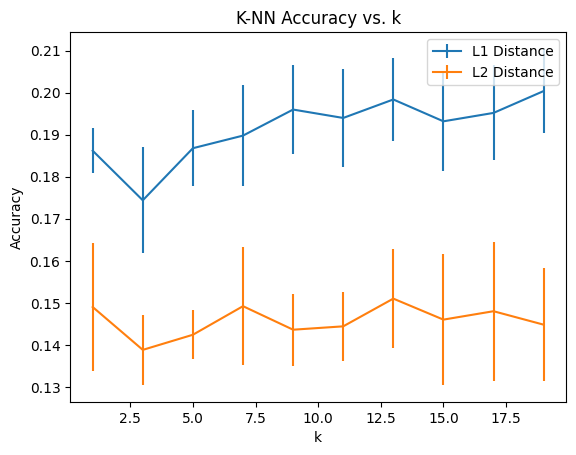

In [9]:
# Plotting the mean accuracies with error bars for both L1 and L2 distance metrics
plt.errorbar(range(1, k_max+1,2), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance")  # Plotting mean accuracies for L1 distance with error bars
plt.errorbar(range(1, k_max+1,2), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance")  # Plotting mean accuracies for L2 distance with error bars
plt.xlabel("k")  # Labeling the x-axis
plt.ylabel("Accuracy")  # Labeling the y-axis
plt.title("K-NN Accuracy vs. k")  # Adding title to the plot
plt.legend()  # Adding legend to differentiate between L1 and L2 distance
plt.show()  # Displaying the plot


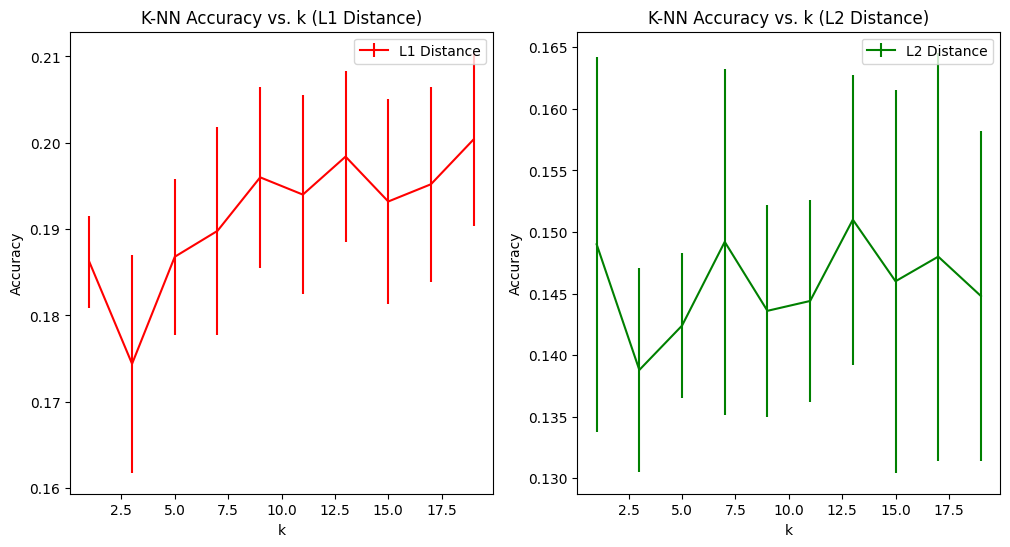

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for L1 distance
ax1.errorbar(range(1, k_max+1,2), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance", color="red")
ax1.set_xlabel("k")
ax1.set_ylabel("Accuracy")
ax1.set_title("K-NN Accuracy vs. k (L1 Distance)")
ax1.legend()

# Plot for L2 distance
ax2.errorbar(range(1, k_max+1,2), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance", color="green")
ax2.set_xlabel("k")
ax2.set_ylabel("Accuracy")
ax2.set_title("K-NN Accuracy vs. k (L2 Distance)")
ax2.legend()

plt.show()